In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def forward_pass(x, m, b):
    return m * x + b

def mse(yhat, y):
    return torch.sum((yhat - y) ** 2) / len(y)

def plot(xt, yt, m, b):
    fig, ax = plt.subplots()

    ax.scatter(xt, yt)
    xmin, xmax = ax.get_xlim()
    ymin = forward_pass(xmin, m.detach().numpy(), b.detach().numpy())
    ymax = forward_pass(xmax, m.detach().numpy(), b.detach().numpy())

    ax.set_xlim([xmin, xmax])
    _ = ax.plot([xmin, xmax], [ymin, ymax], c='C01')

In [3]:
data = pd.read_csv('sat_gpa.csv')

xt = torch.tensor(data['SAT'])
yt = torch.tensor(data['GPA'])

In [19]:
m = torch.tensor(-0.9).requires_grad_()
b = torch.tensor(-0.2).requires_grad_()

epoch = 1000
lr = torch.tensor(0.001)
n = len(yt)

In [23]:
for i in range(0, epoch):
    yhat = forward_pass(xt, m, b)
    C = mse(yhat, yt)
    C.backward()

    new_m = m - lr * m.grad
    new_b = b - lr * b.grad

    m = new_m
    b = new_b
    
    

c:\Users\DeCoder\anaconda3\envs\ml\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  C:\Users\builder\tkoch\workspace\pytorch\pytorch_1647970138273\work\build\aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


TypeError: unsupported operand type(s) for *: 'Tensor' and 'NoneType'

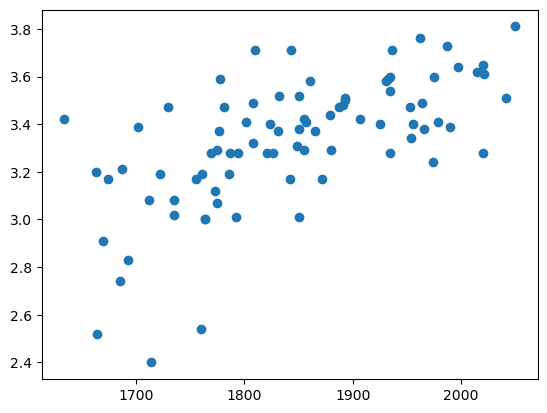

In [21]:
plot(xt, yt, m, b)

(tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        dtype=torch.float64, grad_fn=<SubBackward0>),
 tensor(nan, dtype=torch.float64, grad_fn=<SubBackward0>))

In [7]:
m.grad

c:\Users\DeCoder\anaconda3\envs\ml\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  C:\Users\builder\tkoch\workspace\pytorch\pytorch_1647970138273\work\build\aten\src\ATen/core/TensorBody.h:417.)
  return self._grad
